In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Question 1

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [59]:
data = pd.read_excel(io='2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [60]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Statistical Analysis


After running the describe function, the statistics show:

<LI>A mean cost of ~3145.13</LI>
<LI>A standard deviation of ~41282.54</LI>
<LI>A max value of 704000</LI>

From the above metrics, we have a doubt that the Average Order Value (AOV) is skewed because of the unusual high amount values such as the maximum value of 704000.  For this reason we decide to plot the distribution of the order amounts to get a better view of these values and to understand why the mean is skewed, making it misleading.  The high standard deviation confirms our doubts.  There must be outliars pushing the AOV to be high.

### Plotting Order Amount Distribution

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

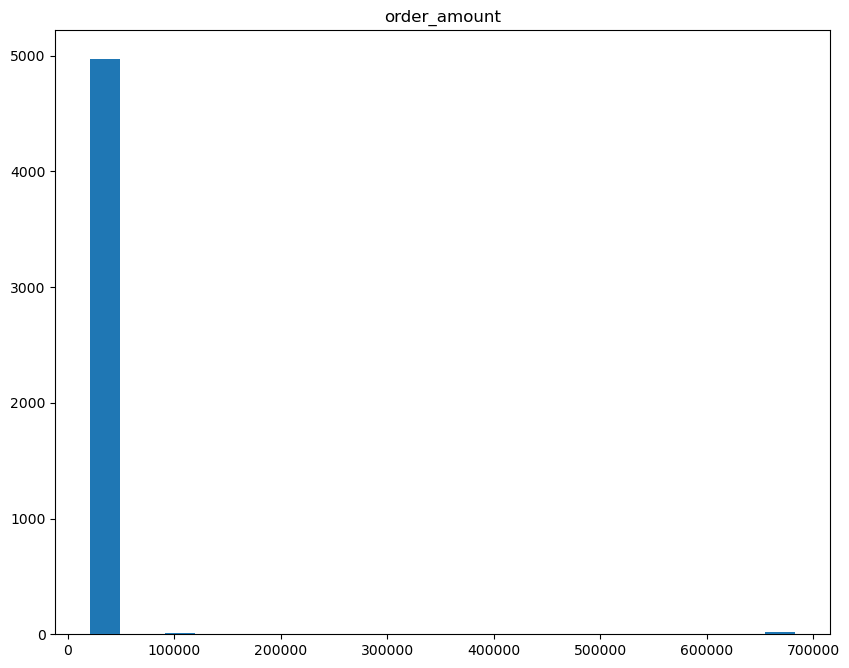

In [55]:
data.hist(column='order_amount',grid=False, figsize=(10,8), zorder=3, rwidth=0.4)

## Analysis Conclusion

The plot confirms the doubts and shows that most values are below 100,000 and very few orders had values around 100,000 and 700,000.  The values above 100,000 must be bulk orders and therefore constitute outliars because they so not reflect a regular behavior.  We therefore count the number of orders above 100,000 and below that value and we see that only 19 orders have a valuw greater than 100,000, of which 17 are around 700,000,  which must be driving the average up while 4981 orders are below that value.

We therefore cannot use the AOV as an evaluation method for the dataset

In [58]:
data_grps = data.groupby(['order_amount']).size()
amnt_grps = data_grps.reset_index(name='num_data_points').sort_values(by='order_amount', ascending = False)
amnt_grps.head(5)

,order_amount,num_data_points
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16


In [51]:
data['order_id'].unique()
outliars = data[data['order_amount'] > 100000]
outliars_count = outliars.count()
outliars_count

order_id          19
shop_id           19
user_id           19
order_amount      19
total_items       19
payment_method    19
created_at        19
dtype: int64

In [52]:
other_values = data[data['order_amount'] < 100000]
others_count = other_values.count()
others_count

order_id          4981
shop_id           4981
user_id           4981
order_amount      4981
total_items       4981
payment_method    4981
created_at        4981
dtype: int64

## b.
What metric would you report for this dataset?

To answer this question, let's take a look at the median of the order amount.  We find the median value to be 284.  This seems to be a better representation than the average.  The median is not affected by the outliars as the average was affected.

## c. 
What is its value?

In [63]:
import statistics
median_order_amount = statistics.median(data['order_amount'])
print("The median value of the order amount is: ", median_order_amount)

The median value of the order amount is:  284.0


# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

## a.

How many orders were shipped by Speedy Express in total?

SELECT count(*) FROM Orders o <BR>
INNER JOIN Shippers s ON o.ShipperID = s.ShipperID <BR>
WHERE s.ShipperName LIKE 'Speedy Express';

The result is : 54

## b.

What is the last name of the employee with the most orders?

SELECT sub.LastName, MAX(sub.cnt) FROM <BR>
(SELECT e.LastName,count(*) as cnt <BR>
FROM Orders o <BR>
INNER JOIN Employees e ON o.EmployeeID = e.EmployeeID <BR>
GROUP BY o.EmployeeID) AS sub; <BR>
    
The Employee last name is : Peacock with 40 orders

## c.

What product was ordered the most by customers in Germany?

SELECT MAX(product_quantity),product_name <BR>
FROM( <BR>
SELECT o.CustomerID, o.OrderID, c.Country, od.ProductID, p.ProductName as product_name, SUM(od.Quantity) as product_quantity <BR>
FROM Customers c <BR>
JOIN Orders o on o.CustomerID = c.CustomerID <BR>
JOIN OrderDetails od on o.OrderID = od.OrderID <BR>
JOIN Products p on od.ProductID = p.ProductID <BR>
where c.Country = 'Germany' <BR>
GROUP BY od.ProductID <BR>
) as A; <BR>
    
    
The most bought product is : Boston Crab Meat with 160 ordered items.